A minimum working example demo of the DeepDEM repository, that demonstrates how to generate inferences from a previously trained model. The notebook expects the following: 

- Previously trained model weights, download from [this link](https://drive.google.com/file/d/1AAvgHryGppS2NaKPAMyG73D1OKyvUhiU/view?usp=drive_link)
- Pre-processed data that can be used for inference
- Access to a GPU 

Users will need the following GDAL libraries to be installed on their machine. Follow the instructions at this [link](https://mothergeo-py.readthedocs.io/en/latest/development/how-to/gdal-ubuntu-pkg.html).

In [45]:
import torch
from pathlib import Path
import os
import subprocess
import rasterio
import matplotlib.pyplot as plt

assert torch.cuda.is_available(), "GPU unavailable"

In [2]:
model_weights_path = Path('/mnt/1.0_TB_VOLUME/karthikv/DeepDEM/model_weights/epoch=12366-step=3091750.ckpt')
model_weights_path.exists()

True

In [41]:
os.system(f"python scripts/inference_example.py {model_weights_path} > inference.log")

100%|██████████| 30/30 [00:18<00:00,  1.59it/s]


0

In [43]:
# Creating a hillshaded version of the original DEM
input_file = '../data/scg_csm_stack/aligned_stereo_1.0m-DEMgdal_fillnodata_md500_si3.tif'
output_file = '../data/scg_csm_stack/scg_merged_lidar_dsm_1.0m-DEM_interpolate_na_hs_kv_012524.tif'
subprocess.run(["gdaldem", "hillshade", "-compute_edges", input_file, output_file])

0...10...20...30...40...50...60...70...80...90...100 - done.


CompletedProcess(args=['gdaldem', 'hillshade', '-compute_edges', '../data/scg_csm_stack/aligned_stereo_1.0m-DEMgdal_fillnodata_md500_si3.tif', '../data/scg_csm_stack/scg_merged_lidar_dsm_1.0m-DEM_interpolate_na_hs_kv_012524.tif'], returncode=0)

In [50]:
with rasterio.open('inference_out.tif') as ds:
    refined_dem = ds.read(1)

with rasterio.open('hs_inference_out.tif') as ds:
    refined_dem_hs = ds.read(1)

with rasterio.open('../data/scg_csm_stack/aligned_stereo_1.0m-DEMgdal_fillnodata_md500_si3.tif') as ds:
    original_dem = ds.read(1)

with rasterio.open('../data/scg_csm_stack/scg_merged_lidar_dsm_1.0m-DEM_interpolate_na_hs_kv_012524.tif') as ds:
    original_dem_hs = ds.read(1)

Text(0.5, 1.0, 'Refined DEM hillshaded')

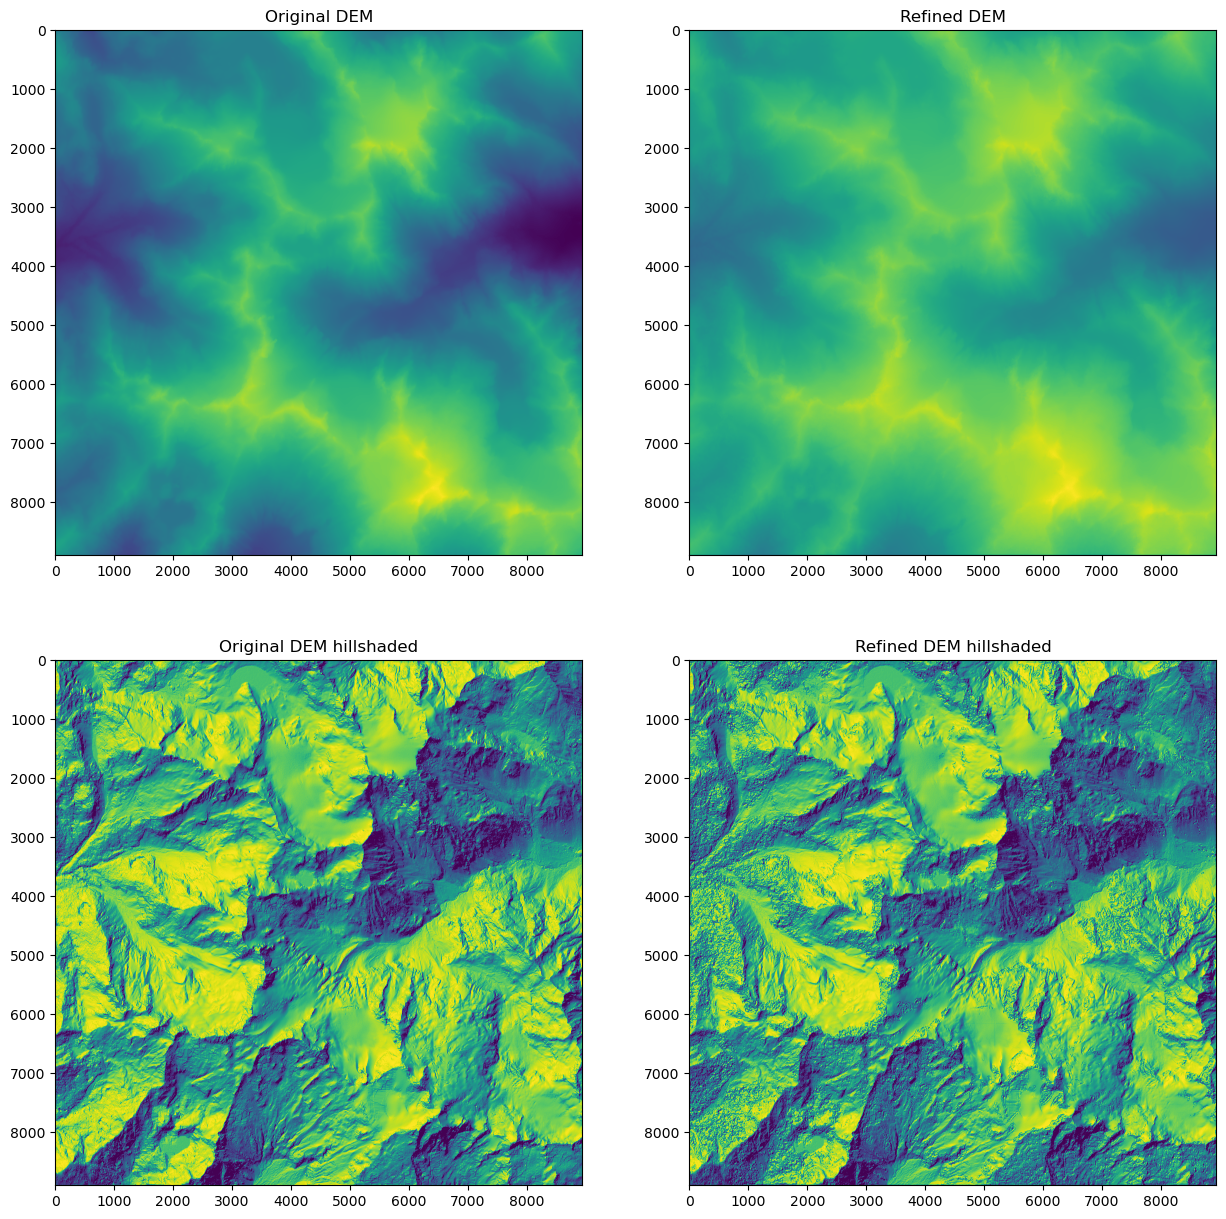

In [55]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))

ax[0, 0].imshow(original_dem)
ax[0, 0].set_title("Original DEM")
ax[0, 1].imshow(refined_dem)
ax[0, 1].set_title("Refined DEM")

ax[1, 0].imshow(original_dem_hs)
ax[1, 0].set_title("Original DEM hillshaded")
ax[1, 1].imshow(refined_dem_hs)
ax[1, 1].set_title("Refined DEM hillshaded")